### Circuit One

In [3]:
from qiskit import *

In [4]:
circuit = QuantumCircuit(2,2) #2 cubits and 2 classical bits

In [5]:
quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register,classical_register) #equivalent to above

In [6]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [7]:
%matplotlib inline

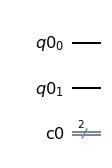

In [8]:
circuit.draw(output='mpl')

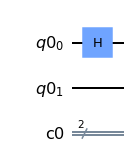

In [9]:
circuit.h(0) #hadamard gate
circuit.draw(output='mpl')

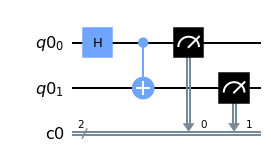

In [10]:
circuit.cx(0,1) # 0-> control qubit, 1-> target qubit
circuit.measure([0,1],[0,1]) #measure qubit 0 and qubit 1 ([0,1]) and associate them with respective classical bits 0 and 1 ([0,1])
circuit.draw(output='mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')

In [12]:
result = execute(circuit,backend=simulator).result()

In [13]:
from qiskit.visualization import plot_histogram

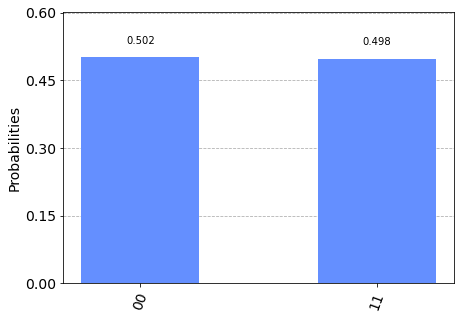

In [14]:
plot_histogram(result.get_counts(circuit))

In [15]:
IBMQ.save_account(open('secrets/ibm_quantum_api.txt').read())

configrc.store_credentials:WARNING:2022-05-09 04:21:18,002: Credentials already present. Set overwrite=True to overwrite.


In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [18]:
provider = IBMQ.get_provider('ibm-q')

In [19]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [20]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 4 & simulated qubits
ibmq_armonk : 7 & 1 qubits
ibmq_santiago : 44 & 5 qubits
ibmq_bogota : 17 & 5 qubits
ibmq_lima : 8 & 5 qubits
ibmq_belem : 15 & 5 qubits
ibmq_quito : 9 & 5 qubits
simulator_statevector : 5 & simulated qubits
simulator_mps : 5 & simulated qubits
simulator_extended_stabilizer : 5 & simulated qubits
simulator_stabilizer : 5 & simulated qubits
ibmq_manila : 13 & 5 qubits


In [21]:
quantum_computer = provider.get_backend('ibmq_bogota') 

In [39]:
import qiskit.tools.jupyter
%qiskit_job_watcher
import math

job = execute(circuit, backend=quantum_computer)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued (15)    

In [ ]:
plot_histogram(job.result().get_counts(circuit))

In [1]:
from qiskit.tools.visualization import plot_bloch_multivector

In [22]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [23]:
def run_on_simulators(circuit):
    statevec_job = execute(circuit, backend=statevector_simulator)
    result = statevec_job.result()
    statevec = result.get_statevector()
    
    num_qubits = circuit.num_qubits
    
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])
    
    qasm_job = execute(circuit, backend=qasm_simulator, shots=1024).result()
    
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [24]:
circuit = QuantumCircuit(2,2)

In [25]:
statevec, counts = run_on_simulators(circuit)

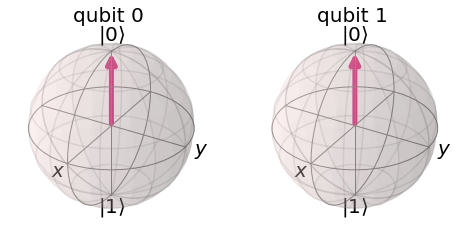

In [26]:
plot_bloch_multivector(statevec)

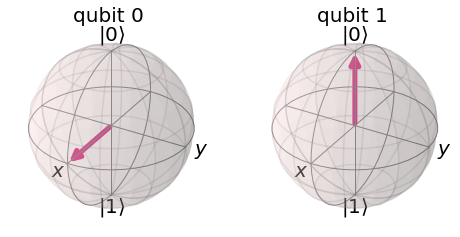

In [27]:
circuit.h(0) #hadamard
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

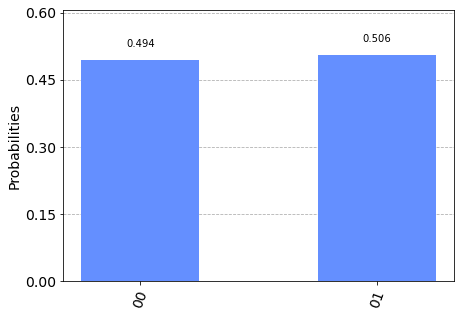

In [28]:
plot_histogram([counts])

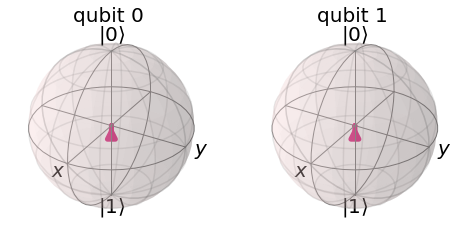

In [30]:
circuit = QuantumCircuit(2,2)
circuit.h(0) #hadamard
circuit.cx(0,1) #CNOT gate
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

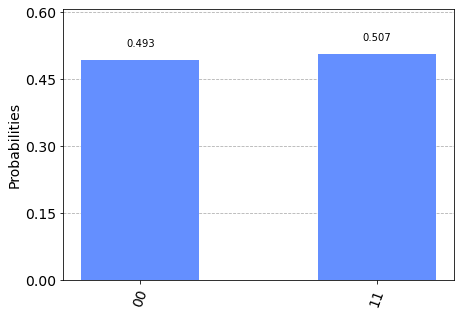

In [31]:
plot_histogram([counts])

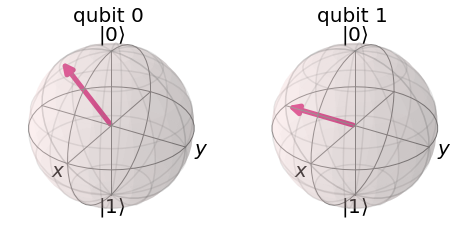

In [34]:
import math
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4, 0) #rotate x axis for cubit 0
circuit.rx(math.pi/2, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

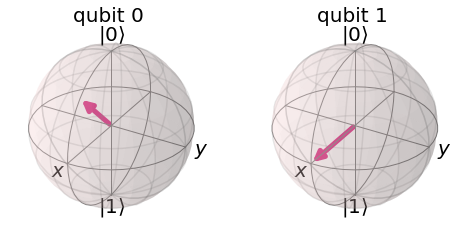

In [35]:
circuit = QuantumCircuit(2,2)
circuit.ry(math.pi/4, 0) #rotate x axis for cubit 0
circuit.ry(math.pi/2, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec) #every rotation is a linear transformation

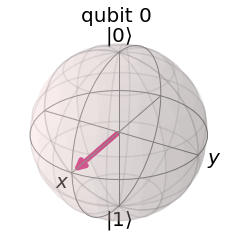

In [36]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec) #notice the equivalence with qubit 1 above -> hadamard gate is a rotation of y axis by pi/2

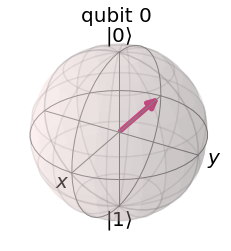

In [37]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec) 